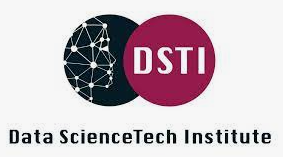

# Project Summary

Nowadays with so many books available, it can be hard to select the best ones to read. The dataset provided is a curation of Goodreads books based on real user information. It can be used for many tasks like predicting a book’s rating or recommending new books.



# Project Objectives

Using the provided dataset, you are asked to train a model that predicts a book’s rating. The project can be submitted as a Jupyter Notebook and should include exploratory analysis of the data, feature engineering and selection, model training and evaluation.

# Project Code



## Add libraries

**Note:** For Google Colab, please upload the "requirements.txt" file into the current Colab workspace and run the following command in order to import all the dependencies.



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
!pip install -r requirements.txt

Saving requirements.txt to requirements.txt
User uploaded file "requirements.txt" with length 251 bytes
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
from scipy import stats

## Data Preparation

### Import dataset

Note : Firstly, we opened the csv file and we observed the following shape with delimiter = ',' : (11128 * 12)

In [3]:
url = 'https://raw.githubusercontent.com/clemcoste/DSTI_ML_with_Python_Project/main/books.csv'

# Check if the dataset is consistent before dataframe creation
#df = pd.read_csv(url, sep=',', index_col="bookID")

There is at least one row (3350) which as more than 12 columns after parsing the dataset with the comma delimiter. After observation, it is related to the fact that there is a comma in the "authors" field, which results in a 13 columns shape. So it means we have to import the dataset, check how many errors of this type are present and then conclude.

In [4]:
# Store the dataset in a Pandas Dataframe and filter bad lines
df_raw = pd.read_csv(url, sep=",", on_bad_lines='skip')

# Local file (offline mode)
#df_raw = pd.read_csv("books.csv", sep=",", index_col="bookID", on_bad_lines='skip')
#df_raw = pd.read_csv("books.csv", sep=",", on_bad_lines='skip')

df_raw.shape

(11123, 12)

We observe that there are 5 rows where dropped in total (0,04% of the dataset).
It is acceptable to continue with this filtered dataset.
Let's now check that there is no NaN values in the dataset :

In [5]:
df_raw.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## Data understanding & exploration

Let's display the info of the dataframe in order to have mainly the different datatypes here:


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Let's display the head and observe the different fields.

In [7]:
df_raw.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
df_raw.tail(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


Below is the information you have regarding the dataset attributes:
1.   bookID: A unique identification number for each book.
2.   title: The name under which the book was published.
3.   authors: The names of the authors of the book. Multiple authors are delimited by
“/”.
4.   average_rating: The average rating of the book received in total.
5.   isbn: Another unique number to identify the book, known as the International
Standard Book Number.
6.   isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
7.   language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.
8.   num_pages: The number of pages the book contains.
9.   ratings_count: The total number of ratings the book received.
10.   text_reviews_count: The total number of written text reviews the book received.
11.   publication_date: The date the book was published.
12.   publisher: The name of the book publisher.

We can have a view with the describe function in order to have an idea of the mean, count, min or max values for example, concerning the numeric values of the dataset.

Here for example with the describe method, all the variables are relevant except for the ISBN code which is an ID.

In [9]:
df_raw.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Something that can be interesting is to plot the different ratings in order to have an overview.

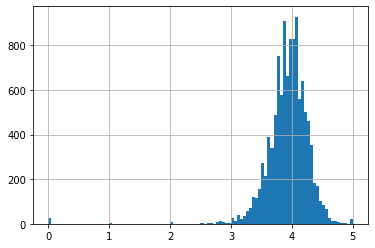

In [10]:
df_raw['average_rating'].hist(bins=100)

In [ ]:
# We can display top10 books based on ratings:
df_raw[["title","average_rating","ratings_count"]].sort_values(by=['ratings_count', 'average_rating'], ascending=[False, False]).head(10)

,title,average_rating,ratings_count
10336,Twilight (Twilight #1),3.59,4597666
1697,The Hobbit or There and Back Again,4.27,2530894
1462,The Catcher in the Rye,3.80,2457092
307,Angels & Demons (Robert Langdon #1),3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,4.36,2128944
2114,Animal Farm,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690


We can't trust this kind of sorting, as the ratings_count will always take the lead on the average_rating. Moreover, we do not take into account here that the best book is a book with a high score, but also with a lot of reviews. For example, I think that "Harry Potter and the Half-Blood Prince" (average_rating = 4.57 / ratings_count = 2095690) should be higher in the top 10, as the number of ratings_count is very similar to the Animal Farm for example (average_rating = 3.93 / ratings_count = 2111750), but the average_rating is much higher than 3.93 for the Animal Farm.
I conclude we should use a Weighted Rating as for iMDB website for example.

![image.png](attachment:image.png)

The following apply:
- v is the number of votes garnered by the book
- m is the minimum number of votes required for the book to be in the chart (the prerequisite)
- R is the mean rating of the book
- C is the mean rating of all the books in the dataset

We have the values for v and R for every book in the form of the ratings_count and average_rating features respectively. Calculating C and m is done by the following code :

In [15]:
C = df_raw['average_rating'].mean()
C

3.9340753393868564

In [16]:
m = df_raw['ratings_count'].quantile(0.85)
m

12959.59999999997

In [17]:
# Function to compute the weighted rating for each book
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    ## Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [18]:
WR = df_raw.apply(weighted_rating, axis=1)
df_WR = df_raw.assign(Weighted_Rating = WR)
WR_plot = df_WR.sort_values(by='Weighted_Rating', ascending=False).head(10)
WR_plot

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Weighted_Rating
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,4.578431
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.566092
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,4.565836
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.556552
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books,4.515560
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.486674
4244,15195,The Complete Maus,Art Spiegelman,4.55,0141014083,9780141014081,eng,296,111475,5966,10/2/2003,Penguin Books,4.485853
6588,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,0836204387,9780836204384,eng,208,49122,368,9/5/1995,Andrews McMeel Publishing,4.484725
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4.479649
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,4.469413


We can now observe that the final result is more conveniant.
Note : Some of the best books are actually collection and boxed set => we will have to filter them after.
Ex : Harry Potter **Collection** (Harry Potter #1-6) / J.R.R. Tolkien 4-Book **Boxed Set**: The Hobbit and ...

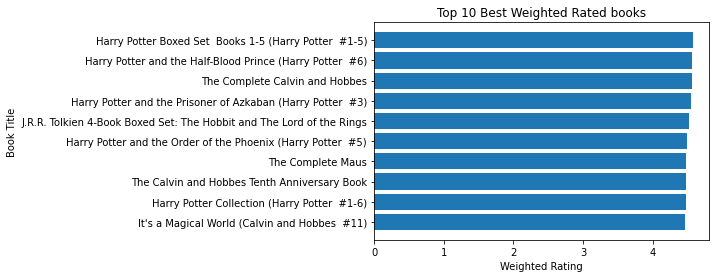

In [20]:
bars = WR_plot['title']
height = WR_plot['Weighted_Rating']
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)

# Display labels and title
plt.title("Top 10 Best Weighted Rated books")
plt.xlabel("Weighted Rating")
plt.ylabel("Book Title")

# Save the plot
plt.savefig('reports/figures/top_10_best_weighted_rated_books.png', bbox_inches='tight', dpi=100)

# Show graphic
plt.gca().invert_yaxis()
plt.show()

We could analyze if the biggest books are impacted on the ratings, compared to lighter books.

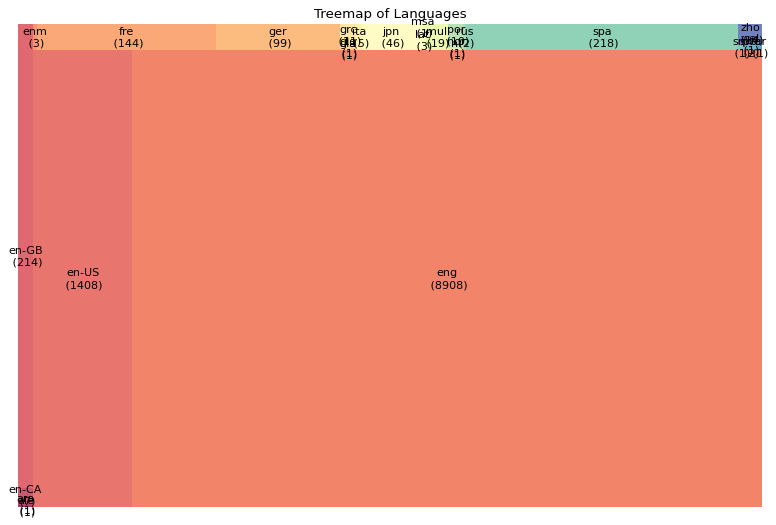

In [21]:
# Prepare Data
df_squarify = df_raw.groupby('language_code').size().reset_index(name='counts')
labels = df_squarify.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_squarify['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Display labels and title 
plt.title('Treemap of Languages')
plt.axis('off')

# Save the plot
plt.savefig('reports/figures/languages_treemap.png', dpi=200)

# Show graphic
plt.show()



Be inspired by : [matplotlib top50 plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#15.-Ordered-Bar-Chart)

Is rating impacted by book size ? It seems that it is not the case, as when book size increases, the ratings are actually going higher.

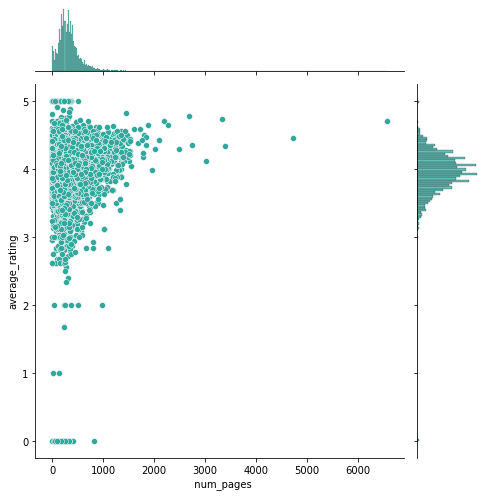

In [22]:
plot = sns.jointplot(data=df_raw, x="  num_pages", y="average_rating", color = '#32a89d', sizes=(100, 200), height=7)

# Save the plot
plt.savefig('reports/figures/jointplot_AverageRating_NumPages.png', dpi=200)

Here we can also check :
- average ratings depending of the review count

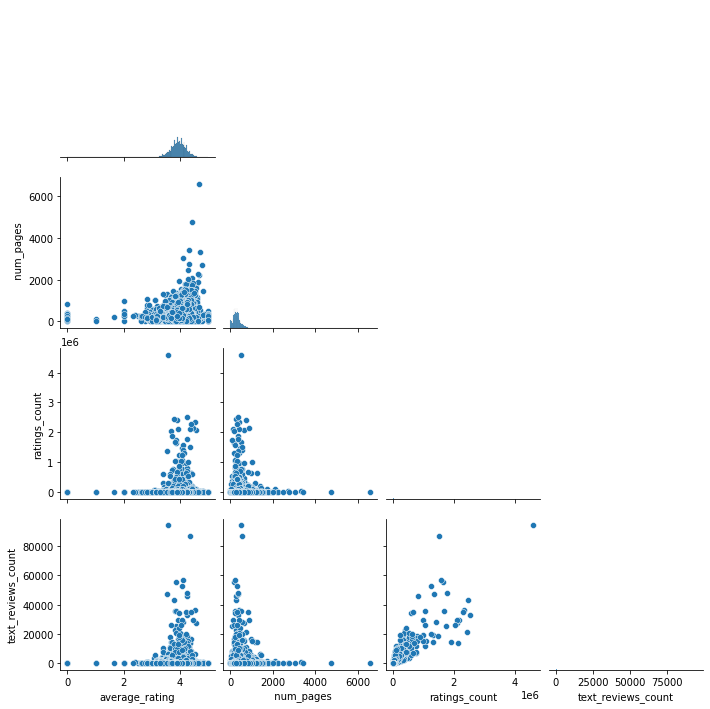

In [23]:
sns.pairplot(df_raw, x_vars=["average_rating", "  num_pages", "ratings_count", "text_reviews_count"],
    y_vars=["average_rating", "  num_pages", "ratings_count", "text_reviews_count"], corner=True)

# Save the plot
plt.savefig('reports/figures/pairplot.png', dpi=200)

## Data cleaning

#### Clean column names

In [24]:
df_rename = df_raw.rename(columns={'  num_pages': 'num_pages'})
print('List of columns :', df_rename.columns)
print('Shape : ', df_rename.shape)

List of columns : Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')
Shape :  (11123, 12)


#### Delete collection and books set

In [25]:
# Filter Collection and Boxed
searchfor = ['Collection', 'Boxed']
df_filtCol = df_rename[~df_rename.title.str.contains('|'.join(searchfor))]
df_filtCol

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


#### Aggregate languages

In [26]:
# We can list all the different languages available
lang_list = list(df_filtCol['language_code'])
lang_list = set(lang_list)
lang_list

{'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho'}

In [27]:
# We observe 5 types of english : 'en-CA','en-GB','en-US','eng', 'enm'
# We can try to check the number of occurrences
print('Nb of books with language = eng => ',len(df_filtCol.query("language_code == 'eng'")))
print('Nb of books with language = en-CA => ',len(df_filtCol.query("language_code == 'en-CA'")))
print('Nb of books with language = en-GB => ',len(df_filtCol.query("language_code == 'en-GB'")))
print('Nb of books with language = en-US => ',len(df_filtCol.query("language_code == 'en-US'")))
print('Nb of books with language = enm => ',len(df_filtCol.query("language_code == 'enm'")))

Nb of books with language = eng =>  8879
Nb of books with language = en-CA =>  7
Nb of books with language = en-GB =>  212
Nb of books with language = en-US =>  1397
Nb of books with language = enm =>  3


In [28]:
# We can aggregate all english languages to simplify the dataset
df_filtLang = df_filtCol.replace(to_replace =["en-CA", "en-GB", "en-US", "enm"], value ="eng")
print('Nb of books with language = eng => ',len(df_filtLang.query("language_code == 'eng'")))
print('Nb of books with language = en-CA => ',len(df_filtLang.query("language_code == 'en-CA'")))
print('Nb of books with language = en-GB => ',len(df_filtLang.query("language_code == 'en-GB'")))
print('Nb of books with language = en-US => ',len(df_filtLang.query("language_code == 'en-US'")))
print('Nb of books with language = enm => ',len(df_filtLang.query("language_code == 'enm'")))

Nb of books with language = eng =>  10498
Nb of books with language = en-CA =>  0
Nb of books with language = en-GB =>  0
Nb of books with language = en-US =>  0
Nb of books with language = enm =>  0


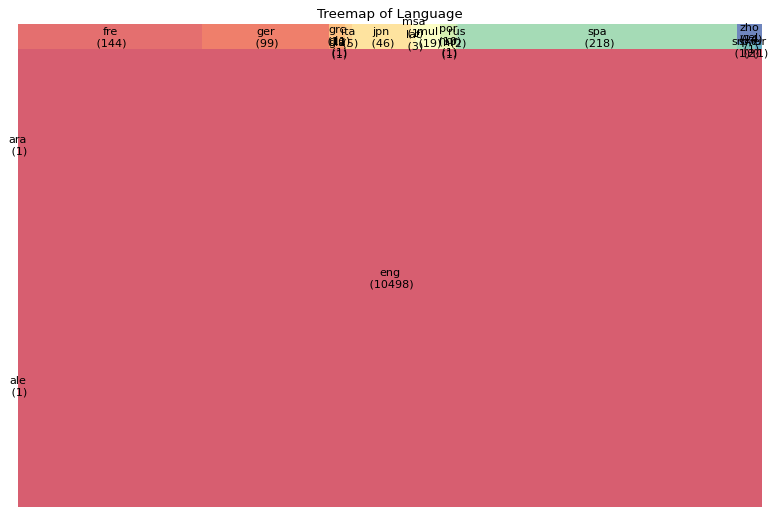

In [55]:
# Prepare Data
df_squarify1 = df_filtLang.groupby('language_code').size().reset_index(name='counts')
labels = df_squarify1.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_squarify1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Language')
plt.axis('off')

plt.show()

#### Delete outliers

In [31]:
print(df_filtLang.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [32]:
z=np.abs(stats.zscore(df_filtLang['num_pages']))
np.where(z > 3)

(array([   19,    21,   170,   185,   198,   230,   232,   264,   332,
          403,   417,   418,   592,   623,   624,   645,   664,   666,
          699,   710,   712,   719,   721,   808,   813,   903,  1000,
         1002,  1051,  1052,  1098,  1099,  1101,  1144,  1172,  1364,
         1515,  1535,  1565,  1569,  1587,  1619,  1689,  1744,  1760,
         1819,  1953,  1973,  1977,  1979,  1981,  1982,  2529,  2530,
         2531,  2532,  2546,  2553,  2617,  2732,  2857,  2947,  2955,
         2957,  3077,  3166,  3228,  3274,  3387,  3393,  3394,  3397,
         3462,  3463,  3467,  3495,  3523,  3640,  3809,  3891,  4076,
         4142,  4240,  4253,  4301,  4302,  4423,  4441,  4656,  4685,
         4726,  4812,  4824,  4827,  4847,  5014,  5015,  5017,  5018,
         5027,  5037,  5259,  5328,  5341,  5354,  5355,  5357,  5396,
         5436,  5446,  5464,  5587,  5594,  5702,  5937,  6233,  6238,
         6275,  6279,  6322,  6424,  6426,  6472,  6561,  6776,  6777,
      

In [33]:
df_z_num_pages = df_filtLang[(np.abs(stats.zscore(df_filtLang['num_pages'])) < 3)]
df_z_num_pages

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


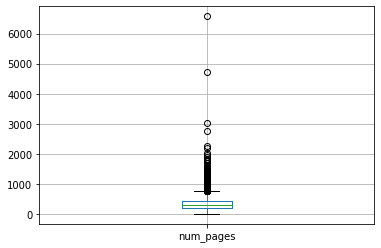

In [56]:
df_filtLang.boxplot(column=['num_pages'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/numPages_w_Outliers.png', dpi=200)

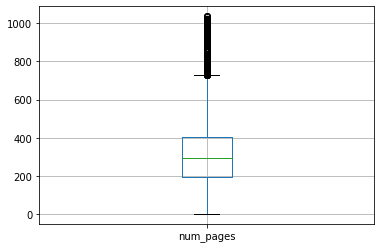

In [35]:
df_z_num_pages.boxplot(column=['num_pages'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/numPages_wo_Outliers.png', dpi=200)

In [36]:
z_ratingCount=np.abs(stats.zscore(df_filtLang['ratings_count']))
np.where(z > 3)

(array([   19,    21,   170,   185,   198,   230,   232,   264,   332,
          403,   417,   418,   592,   623,   624,   645,   664,   666,
          699,   710,   712,   719,   721,   808,   813,   903,  1000,
         1002,  1051,  1052,  1098,  1099,  1101,  1144,  1172,  1364,
         1515,  1535,  1565,  1569,  1587,  1619,  1689,  1744,  1760,
         1819,  1953,  1973,  1977,  1979,  1981,  1982,  2529,  2530,
         2531,  2532,  2546,  2553,  2617,  2732,  2857,  2947,  2955,
         2957,  3077,  3166,  3228,  3274,  3387,  3393,  3394,  3397,
         3462,  3463,  3467,  3495,  3523,  3640,  3809,  3891,  4076,
         4142,  4240,  4253,  4301,  4302,  4423,  4441,  4656,  4685,
         4726,  4812,  4824,  4827,  4847,  5014,  5015,  5017,  5018,
         5027,  5037,  5259,  5328,  5341,  5354,  5355,  5357,  5396,
         5436,  5446,  5464,  5587,  5594,  5702,  5937,  6233,  6238,
         6275,  6279,  6322,  6424,  6426,  6472,  6561,  6776,  6777,
      

In [37]:
df_z_ratings_count = df_z_num_pages[(np.abs(stats.zscore(df_z_num_pages['ratings_count'])) < 2)]
df_z_ratings_count.shape

(10764, 12)

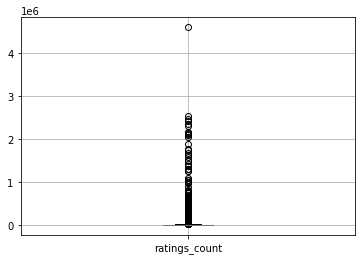

In [57]:
boxplot = df_z_num_pages.boxplot(column=['ratings_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/ratingsCount_w_Outliers.png', dpi=200)

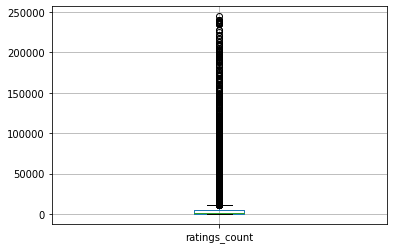

In [58]:
boxplot = df_z_ratings_count.boxplot(column=['ratings_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/ratingsCount_wo_Outliers.png', dpi=200)

In [40]:
df_z_text_reviews_count = df_z_ratings_count[(np.abs(stats.zscore(df_z_ratings_count['text_reviews_count'])) < 2)]
df_z_text_reviews_count.shape

(10365, 12)

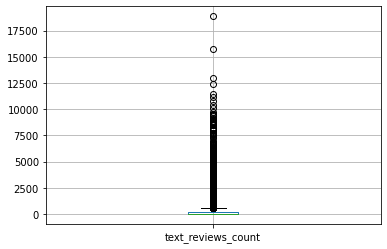

In [59]:
boxplot = df_z_ratings_count.boxplot(column=['text_reviews_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/textReviewsCount_w_Outliers.png', dpi=200)

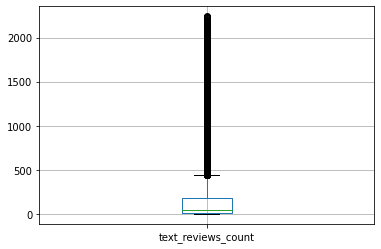

In [60]:
boxplot = df_z_text_reviews_count.boxplot(column=['text_reviews_count'], return_type='axes')
# Save the plot
plt.savefig('reports/figures/textReviewsCount_wo_Outliers.png', dpi=200)

In [43]:
df_zFinal = df_z_text_reviews_count

#### Delete not relevant = data processing

In [44]:
df_raw.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [45]:
df_processed = df_zFinal.drop(columns=["title","authors","isbn","isbn13","publisher","publication_date"])
df_processed.head(5)

,bookID,average_rating,language_code,num_pages,ratings_count,text_reviews_count
2,4,4.42,eng,352,6333,244
5,9,3.74,eng,152,19,1
7,12,4.38,eng,815,3628,254
9,14,4.22,eng,215,4930,460
10,16,4.22,eng,6,1266,253


In [46]:
df_processed.shape

(10365, 6)

Save the data processed into a csv

In [54]:
df_processed.to_csv('data/processed/books_processed.csv', index=False)

## Data encoding

The idea is to convert string fields into numeric fields in order to be able to be taking into account for the ML model.

In [62]:
df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.language_code, drop_first=False, prefix='lang')],axis=1).drop(columns="language_code")

In [ ]:
df_processed.dtypes

bookID                  int64
average_rating        float64
num_pages               int64
ratings_count           int64
text_reviews_count      int64
lang_ale                uint8
lang_ara                uint8
lang_eng                uint8
lang_fre                uint8
lang_ger                uint8
lang_gla                uint8
lang_glg                uint8
lang_grc                uint8
lang_ita                uint8
lang_jpn                uint8
lang_lat                uint8
lang_msa                uint8
lang_mul                uint8
lang_nl                 uint8
lang_nor                uint8
lang_por                uint8
lang_rus                uint8
lang_spa                uint8
lang_srp                uint8
lang_swe                uint8
lang_tur                uint8
lang_wel                uint8
lang_zho                uint8
dtype: object

In [ ]:
df_processed

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
2,4,4.42,352,6333,244,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,3.74,152,19,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12,4.38,815,3628,254,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,14,4.22,215,4930,460,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,16,4.22,6,1266,253,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,4.06,512,156,20,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,45633,4.08,635,783,56,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,45634,3.96,415,820,95,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,45639,3.72,434,769,139,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's know handle the ratings which are considered as continuous as they are float, so we should convert them into categorical variables (multiclass).

from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(df_processed.average_rating)
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = ['average_rating_encoded']
encoded_df

df_bookID = df_processed[["bookID"]]
average_rating_encoded_df = encoded_df.join(df_bookID)
average_rating_encoded_df

final = pd.concat([df_processed, average_rating_encoded_df], axis=1)
final.drop('bookID', inplace=True, axis=1)
final.drop('average_rating', inplace=True, axis=1)
final

In [ ]:
df_processed.isna().sum()

bookID                0
average_rating        0
num_pages             0
ratings_count         0
text_reviews_count    0
lang_ale              0
lang_ara              0
lang_eng              0
lang_fre              0
lang_ger              0
lang_gla              0
lang_glg              0
lang_grc              0
lang_ita              0
lang_jpn              0
lang_lat              0
lang_msa              0
lang_mul              0
lang_nl               0
lang_nor              0
lang_por              0
lang_rus              0
lang_spa              0
lang_srp              0
lang_swe              0
lang_tur              0
lang_wel              0
lang_zho              0
dtype: int64

In [ ]:
df_processed.dtypes

bookID                  int64
average_rating        float64
num_pages               int64
ratings_count           int64
text_reviews_count      int64
lang_ale                uint8
lang_ara                uint8
lang_eng                uint8
lang_fre                uint8
lang_ger                uint8
lang_gla                uint8
lang_glg                uint8
lang_grc                uint8
lang_ita                uint8
lang_jpn                uint8
lang_lat                uint8
lang_msa                uint8
lang_mul                uint8
lang_nl                 uint8
lang_nor                uint8
lang_por                uint8
lang_rus                uint8
lang_spa                uint8
lang_srp                uint8
lang_swe                uint8
lang_tur                uint8
lang_wel                uint8
lang_zho                uint8
dtype: object

In [ ]:
df_processed.tail(5)

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
11118,45631,4.06,512,156,20,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,45633,4.08,635,783,56,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,45634,3.96,415,820,95,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,45639,3.72,434,769,139,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11122,45641,3.91,272,113,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10365 entries, 2 to 11122
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10365 non-null  int64  
 1   average_rating      10365 non-null  float64
 2   num_pages           10365 non-null  int64  
 3   ratings_count       10365 non-null  int64  
 4   text_reviews_count  10365 non-null  int64  
 5   lang_ale            10365 non-null  uint8  
 6   lang_ara            10365 non-null  uint8  
 7   lang_eng            10365 non-null  uint8  
 8   lang_fre            10365 non-null  uint8  
 9   lang_ger            10365 non-null  uint8  
 10  lang_gla            10365 non-null  uint8  
 11  lang_glg            10365 non-null  uint8  
 12  lang_grc            10365 non-null  uint8  
 13  lang_ita            10365 non-null  uint8  
 14  lang_jpn            10365 non-null  uint8  
 15  lang_lat            10365 non-null  uint8  
 16  lang

## Choose a model

## Model training

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df_train, df_test = train_test_split(df_processed,test_size = 0.2, random_state = 10)

In [65]:
print('Total length for the dataset processed :',len(df_processed))
print('Total length for the train dataset :',len(df_train))
print('Total length for the test dataset :',len(df_test))

Total length for the dataset processed : 10365
Total length for the train dataset : 8292
Total length for the test dataset : 2073


In [66]:
# get the values of the columns for the training data
X_train = df_train.iloc[:, 2:27]
y_train = df_train.average_rating.values

In [67]:
X_train

,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,lang_gla,lang_glg,...,lang_mul,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel
5999,256,25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9865,288,1182,134,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2118,256,264,35,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2407,24,113,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8824,160,37,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,158,1379,103,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7913,225,2592,80,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1532,168,14,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7915,240,1828,58,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
y_train

array([3.96, 3.96, 3.72, ..., 4.13, 3.54, 4.11])

In [69]:
# get the values of the columns for the test data
X_test = df_test.iloc[:, 2:27].values
y_test = df_test.average_rating.values

In [ ]:
X_test

array([[  290,    30,     4, ...,     0,     0,     0],
       [  278, 72294,  1755, ...,     0,     0,     0],
       [   63,    18,     1, ...,     0,     0,     0],
       ...,
       [  576,  1227,    79, ...,     0,     0,     0],
       [   92,   210,    20, ...,     0,     0,     0],
       [  722, 41737,   831, ...,     0,     0,     0]])

In [ ]:
y_test

array([3.39, 3.87, 4.11, ..., 4.11, 3.98, 3.79])

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
# here we train the model on the training data
predictions = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [73]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()})
pred.head(20)

,Actual,Predicted
0,3.39,3.915136
1,3.87,4.022988
2,4.11,3.870510
3,4.05,4.038795
4,3.13,3.902194
5,4.06,3.886549
6,4.01,3.947143
7,4.12,3.900489
8,4.02,3.976872
9,4.53,3.945367


In [74]:
abs(predictions - y_test).sum()/len(y_test)

0.23115764602065114

In [75]:
import sklearn.metrics as metrics

In [76]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23115764602065114
MSE: 0.1293032788069235
RMSE: 0.3595876510767903


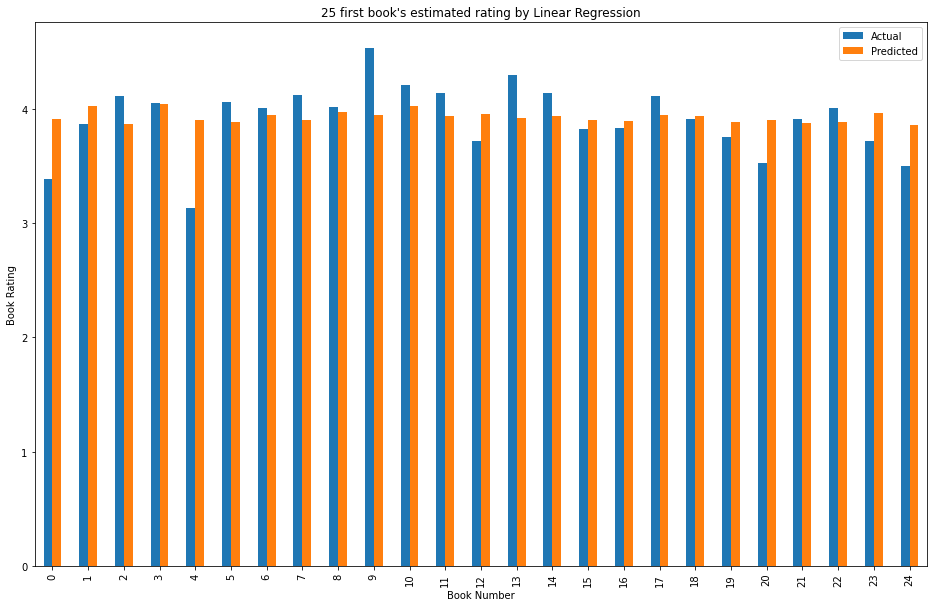

In [78]:
pred = pred.head(25)
pred.plot(kind='bar', figsize=(16, 10))

# Display labels and title
plt.title("25 first book's estimated rating by Linear Regression")
plt.xlabel("Book Number")
plt.ylabel("Book Rating")

# Save the plot
plt.savefig('reports/figures/LinearRegression_pred.png', dpi=200)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=(25, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1 (Dense)       (None, 128)               3328      
                                                                 
 dense_layer_2 (Dense)       (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 11,649
Trainable params: 11,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train
model.fit(X_train, y_train, epochs=200, verbose=2, batch_size=8)

## Model evaluation

In [ ]:
#Model evaluation
loss = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', loss)

65/65 [==============================] - 0s 2ms/step - loss: 0.1167
Mean squared error on test data:  0.11666689068078995


In [ ]:
# Save the entire model as a SavedModel.
# !mkdir -p saved_model
model.save('models/books.h5')  

Amélioration :
- Tenir compte de la date
- Normaliser les datas avant le modèle